<a href="https://colab.research.google.com/github/mandar-tabib-1/ROM_Prague/blob/main/Reconstruc_AI_colab_windspeed_googlecolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/mandar-tabib-1/ROM_Prague.git

Cloning into 'ROM_Prague'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 163 (delta 3), reused 2 (delta 0), pack-reused 154 (from 1)
Receiving objects: 100% (163/163), 185.98 MiB | 30.79 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Updating files: 100% (33/33), done.


In [ ]:
%cd ROM_Prague/

/content/ROM_Prague


In [ ]:
!pwd

/content/ROM_Prague


# $\color{green}{\text{AI computed Wind and TKE for drone operations for parts of prague city.}}$


## $\color{red}{\text{Purpose: Demonstration of model for research purpose for EU AI4HyDROP project.}}$

### The AI model is trained to predict urban scale wind and turbulence on a segment of Prague city (as marked by yellow borders in the image below.)


## $\color{red}{\text{User Input and AI Output:}}$
### User provides only date_and_hrs_only for prediction in format '2024-05-18 09:00:00'. User can also provide drone trajectory in this urban landscape.

### User gets the wind and turbulence in a segment of city using AI.
### User then can use provided functions to obtain the wind and turbulence values in Drone Flight path (both absolute and normalized).
### User can also use to find the locations with maximum turbulence and maximum wind speed to enable decision on corridor


## $\color{red}{\text{About AI model and its Limitations }}$:
### The AI model used below is trained to operate with input wind speed and wind direction from meso-scale weather forecasting model.
### The users takes inputs (wind speed and wind direction) from meso-scale weather model for a particular date and hour,
### and feeds this to the AI model to obtain wind and turbulence in the city area (which the meso-scale scle weahter model cannot provide)

### The AI model is trained on a boundary limited to latitude/longitude range of (lat,long):  minimum (50.04585949932427,14.430968123655077) and maximum (max_latitude = 50.053957709673476,max_longitude=4.430968123655077) and limited to wind speed of: 0.5 to 8 m/s.

### The AI model is trained on 8 wind directions and 4 wind speeds (0.5,2,5,5,8 mps at nearest mast location).
### Outside the range, the AI may give results but its accuracy reduces especially for extrapolation.

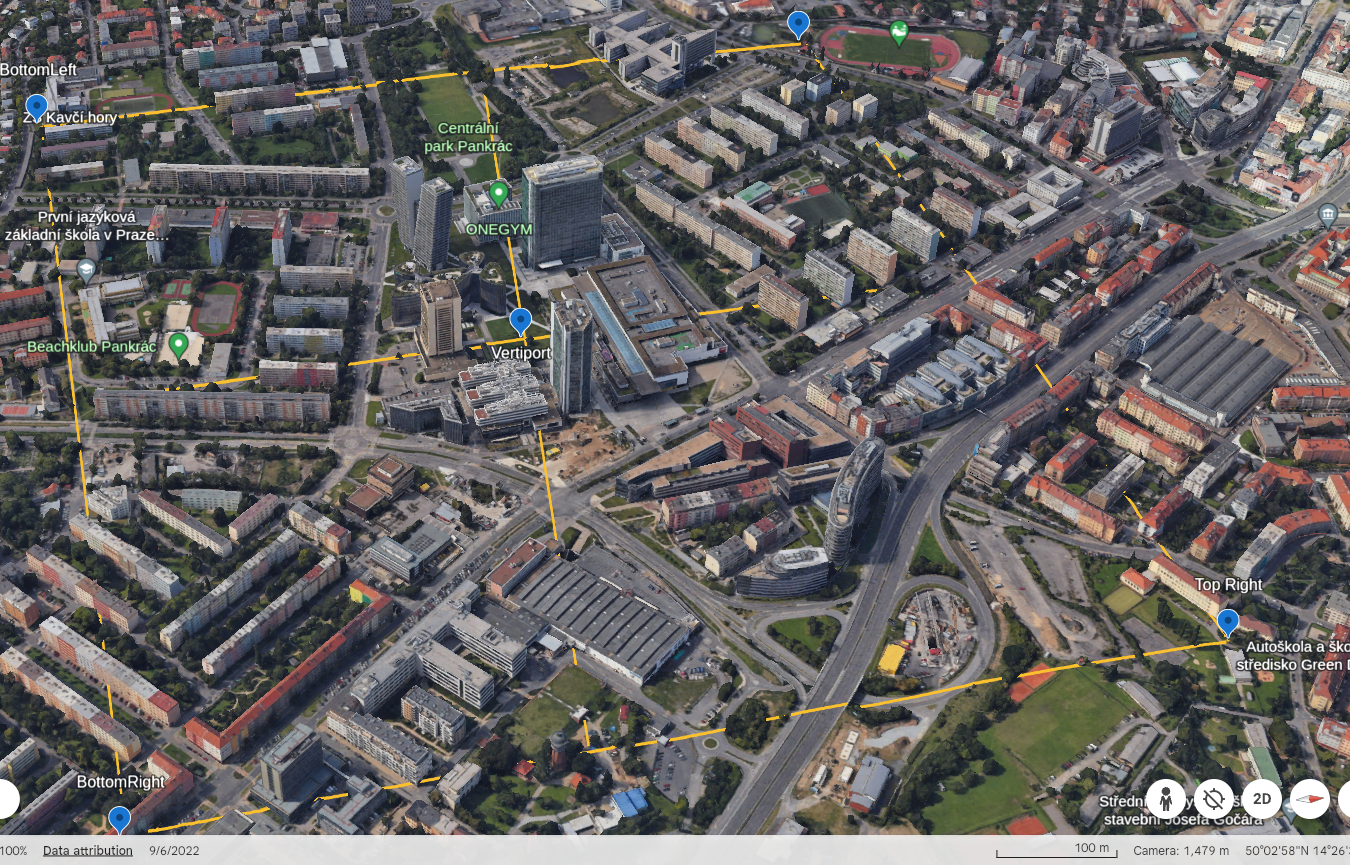

In [ ]:

%load_ext autoreload
%autoreload 2

from IPython.display import Image
Image(filename='praguesimulated.png')


## The AI model is trained to predict urban scale wind and turbulence on a segment of Prague city (as marked by yellow borders in the image above.)

#### Load libraries after adding relative path.

In [ ]:
!pip install pyvista==0.43.3 --quiet

In [ ]:
!pip install mplcursors==0.5.3 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 61.3 MB/s eta 0:00:00


In [ ]:
# Install requirements !pip install -r requirements.txt


import os,sys
current_dir = os.getcwd()    # Get the current directory.
sys.path.append(current_dir) #Append to path so that libimport library is detected.
fn2=os.path.join(current_dir, 'Results','data_POD') #Define path to store the results.

sys.path.append(fn2)

import libimport
import pandas as pd
import math
import numpy as np
import random
import requests

# Demonstration based on user input

### Step 1. USER INPUT of TIME : DATE AND HOURS in 'YYYY-MM-DD HR:MIN:SEC' FORMAT for wind prediction.
#### Input should be for future time upto 3 days

In [ ]:
date_and_hrs_only = '2025-01-18 09:00:00'# YY-MM-DD HR:MIN:SS


### Step 2. USER INPUT of DRONE TRAJECTORY : LATITUDE AND LONGITUDE AS LIST.
#### Input latitude and longitude should be within the min and maximum range mentioned below. Otherwise - code will throw error as AI is not trained outside this.

In [ ]:
#For Demo : 10 randomly generated points within the following maximum and minimum.
random_seed_gen=101
random.seed(random_seed_gen)
# Define the minimum and maximum values for latitude and longitude
min_latitude = 50.04585949932427
max_latitude = 50.053957709673476
min_longitude = 14.430968123655077
max_longitude = 14.444980676344922

# Generate 10 random latitude and longitude values within the specified range

random_coordinates = [(random.uniform(min_latitude, max_latitude),\
                       random.uniform(min_longitude, max_longitude))\
    for _ in range(10)]


### Step 3: RUN AI Model using the user-defined inputs to obtain wind field and turbulence in parts of prague.

In [ ]:
Macroscale_ws_wd_prediction, wind_data_near_drone_trajectory,locations_at_high_turbulence,locations_at_high_wind_magnitude,merged_dataframe_U_k_Relative_2_vertiport_reconstructed=libimport.demo(random_coordinates,date_and_hrs_only,fn2,API_KEY = 'fa3e3882b6508618a835169fb753d745',visualization=False)

 
Inputs obtained from Meso-scale open_weather_map for 2024-10-29 09:00:00 is :
wind direction is 261 degrees and wind speed is 2.2 mps
 
  
COMPUTING: AI model is obtaining Wind Velocity and Turbulence in the city region (micro-scale predictions) using the input meso-scale wind direction and wind-speed for selected data and time.
  
Directory '/content/ROM_Prague/Results/data_POD/CSV_Database' created successfully.
CSV file saved successfully: /content/ROM_Prague/Results/data_POD/CSV_Database/k_261_2.2_Output_all.csv
 
Done. VTK reconstruction saved at: /content/ROM_Prague/Results/data_POD/VTK_Database/Recon_VTK_added_all_ws_wdk.vtk
 
Transformation completed. Output saved to: /content/ROM_Prague/Results/data_POD/CSV_Database/k_261_Output_Transformed_all.csv
3.458138986
CSV file saved successfully: /content/ROM_Prague/Results/data_POD/CSV_Database/U_261_2.2_Output_all.csv
 
Done. VTK reconstruction saved at: /content/ROM_Prague/Results/data_POD/VTK_Database/Recon_VTK_added_all_ws_wdU.

***

# $\color{red}{\text{RESULTS}} $

***

## $\color{green}{\text{Result 1 below.  "wind\_data\_near\_drone\_trajectory" DataFrame}} $
 #### " This Dataframe shows following things at provided drone trajectories:
- #### latitude,longitude : Specified user-input locations of drone trajectory (input).
- #### X,Y,Z : Corresponding "distance in meters from the vertiport" for the location.
- #### All Column names are variables : (Turbulent Kinetic Energy (TKE), Velocity_magnitude,  Velocity components (Velocity_X,Velocity_Y, Velocity_Z) and Normalized Velocity_mag and Normalized_TKE ) at the specified drone locations . "
- > ###### Normalized variables between 0 to 1. Value of 1 in normalized variable means high value of TKE or velocity at that location while 0 means lowest value.

In [ ]:
wind_data_near_drone_trajectory.loc[:, wind_data_near_drone_trajectory.columns != "Velocity_Magnitude"]

latitude  longitude  Normalized_Velocity       tke  \
26409   50.050487  14.433828             0.518579  0.451276   
114859  50.053627  14.443837             0.435173  0.136834   
83659   50.049661  14.440405             0.309121  0.201428   
28059   50.047677  14.434114             0.530363  0.505010   
85709   50.048173  14.440691             0.517071  0.282741   
120509  50.047512  14.444695             0.237006  0.199726   
22659   50.046355  14.433542             0.554692  0.587818   
95209   50.046521  14.441835             0.451489  0.322467   
58409   50.048834  14.437545             0.541792  0.313042   
78309   50.048504  14.439833             0.400615  0.326554   

        Normalized_turbulence           X           Y           Z  \
26409                0.194839 -295.918367   64.288143  297.618776   
114859               0.058777  418.367347  413.278204  297.618776   
83659                0.086727  173.469388  -27.551347  297.618776   
28059                0.218090 -275.510204 -247.966122  297.618776   
85709                0.121912  193.877551 -192.862429  297.618776   
120509               0.085991  479.591837 -266.334020  297.618776   
22659                0.253922 -316.326531 -394.909306  297.618776   
95209                0.139102  275.510204 -376.541408  297.618776   
58409                0.135024  -30.612245 -119.390837  297.618776   
78309                0.140871  132.653061 -156.126633  297.618776   

        Velocity_X_  Velocity_Y_  Velocity_Z_  Velocity_mag  
26409      1.985573     0.345653     0.075763      2.016858  
114859     1.678070     0.218874    -0.026775      1.692496  
83659      1.152955     0.322258     0.111024      1.202282  
28059      2.030848     0.357961    -0.046899      2.062688  
85709      1.954910     0.467774    -0.060089      2.010994  
120509     0.839815     0.375270    -0.060397      0.921827  
22659      2.136375     0.298062     0.031741      2.157300  
95209      1.734111     0.251421     0.114003      1.755947  
58409      2.098297    -0.086776    -0.172115      2.107132  
78309      1.506773     0.388515     0.079812      1.558101

****

## $\color{green}{\text{Result 2 below.  "locations\_at\_high\_turbulence" DataFrame}} $
 #### " This Dataframe shows locations within the computational domain where turbulence is high (> 0.95 normalized TKE values). The column name below refers to : "
- #### latitude,longitude : lat,long of region with high normalized tke.
- #### X,Y,Z : Corresponding "distance in meters from the vertiport" for the location.
- #### All Column names are variables : (Turbulent Kinetic Energy (TKE), Velocity_magnitude,  Velocity components (Velocity_X,Velocity_Y, Velocity_Z) and Normalized Velocity_mag and Normalized_TKE ) at the maximum high turbulence drone locations . "
- > ###### Normalized variables between 0 to 1. Value of 1 in normalized variable means high value of TKE or velocity at that location while 0 means lowest value.

In [ ]:
locations_at_high_turbulence

X           Y           Z       tke  Velocity_X_  Velocity_Y_  \
3159 -479.591837 -211.230327  297.618776  2.114510     3.590688     0.136906   
3209 -479.591837 -192.862429  297.618776  2.186767     3.685448     0.437279   
3259 -479.591837 -174.494531  297.618776  2.144148     3.593387     0.695817   

      Velocity_Z_   latitude  longitude  Velocity_mag  Normalized_Velocity  \
3159     1.016418  50.048008  14.431254      3.734286             0.960193   
3209     1.162460  50.048173  14.431254      3.889094             1.000000   
3259     0.981147  50.048339  14.431254      3.789359             0.974355   

      Normalized_turbulence  
3159               0.914538  
3209               0.945804  
3259               0.927363

***

***

## $\color{green}{\text{Result 3 below.  "locations\_at\_high\_wind\_magnitude" DataFrame}} $
 #### " This Dataframe result shows locations within the computational domain where wind magnitude is high (> 0.95 normalized wind velocity magnitude values). The column name below refers to : "
- #### latitude,longitude : lat,long of region with high normalized wind velocity magnitude.
- #### X,Y,Z : Corresponding "distance in meters from the vertiport" for the location.
- #### All Column names are variables : (Turbulent Kinetic Energy (TKE), Velocity_magnitude,  Velocity components (Velocity_X,Velocity_Y, Velocity_Z) and Normalized Velocity_mag and Normalized_TKE ) at the maximum high turbulence drone locations . "
- > ###### Normalized variables between 0 to 1. Value of 1 in normalized variable means high value of TKE or velocity at that location while 0 means lowest value.

In [ ]:
locations_at_high_wind_magnitude

X           Y           Z       tke  Velocity_X_  Velocity_Y_  \
3158 -479.591837 -211.230327  291.834245  2.272648     3.309248     0.087627   
3208 -479.591837 -192.862429  291.834245  2.312013     3.427613     0.463079   
3258 -479.591837 -174.494531  291.834245  2.259695     3.394651     0.833227   

      Velocity_Z_   latitude  longitude  Velocity_mag  Normalized_Velocity  \
3158     0.850496  50.048008  14.431254      3.417915             0.878843   
3208     1.031902  50.048173  14.431254      3.609404             0.928081   
3258     0.890026  50.048339  14.431254      3.606947             0.927450   

      Normalized_turbulence  
3158               0.982966  
3208               1.000000  
3258               0.977361

***

***

## $\color{green}{\text{Result 4. More Detailed Reports : See VTK and CSV}} $


# In case more detailed results are required (like, flow at all locations in the parts of city, then see the CSV and VTK generated files mentioned when the function is run.)

***

***

## $\color{green}{\text{Result 5. Comparison of AI micro-scale vs Meso-scale predictions Vs CFD micro-scale}} $


## $\color{green}{\text{Result 5 below.  "AI-Generated Micro-scale prediction Vs Meso-scale Open weather map."}}$
 > ### What results shows : The Microscale prediction with AI for urban-scale should be preferred as compared to Meso-scale weather forecasting prediction in urban landscape.
#### Reason: The predictions using both models below show that at all selected drone locations, the meso-scale weather forecasting model shows the same velocity and magnitude and it does not capture effect of buildings and terrain. Hence predicts the same wind speed at locations in the urban city.
#### AI model below is able to account for micro-scale urban building impacts on wind and turbulence similar to CFD dataset. Reason: The wind and velocity varies at selected drone trajectory location and is not constant. The vecotr field and contour shows variations too.

In [ ]:
#Meso-scale data results at specificied drone path (all are same).

#Note: ws=Velocity_mag
#Note: wd=wind direction

Macroscale_ws_wd_prediction

lat        lon   ws   wd
0  50.050566  14.433697  2.2  261
1  50.053676  14.443915  2.2  261
2  50.049642  14.440265  2.2  261
3  50.047597  14.434075  2.2  261
4  50.048196  14.440671  2.2  261
5  50.047579  14.444576  2.2  261
6  50.046429  14.433677  2.2  261
7  50.046579  14.441756  2.2  261
8  50.048828  14.437578  2.2  261
9  50.048500  14.439900  2.2  261

In [ ]:
#AI Generated
wind_data_near_drone_trajectory[['latitude','longitude','Velocity_mag']]

latitude  longitude  Velocity_mag
26409   50.050487  14.433828      2.016858
114859  50.053627  14.443837      1.692496
83659   50.049661  14.440405      1.202282
28059   50.047677  14.434114      2.062688
85709   50.048173  14.440691      2.010994
120509  50.047512  14.444695      0.921827
22659   50.046355  14.433542      2.157300
95209   50.046521  14.441835      1.755947
58409   50.048834  14.437545      2.107132
78309   50.048504  14.439833      1.558101

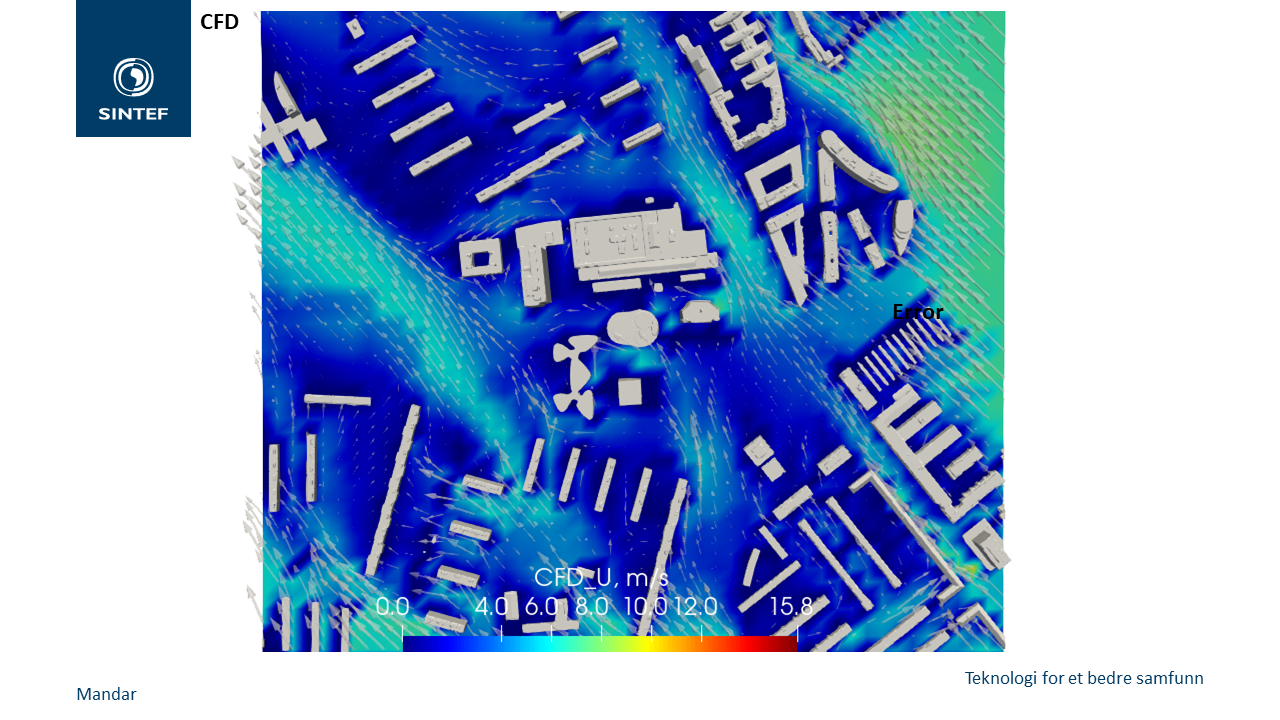

In [ ]:
# CFD Vs AI for training data.
Image(filename='Slide1.PNG')


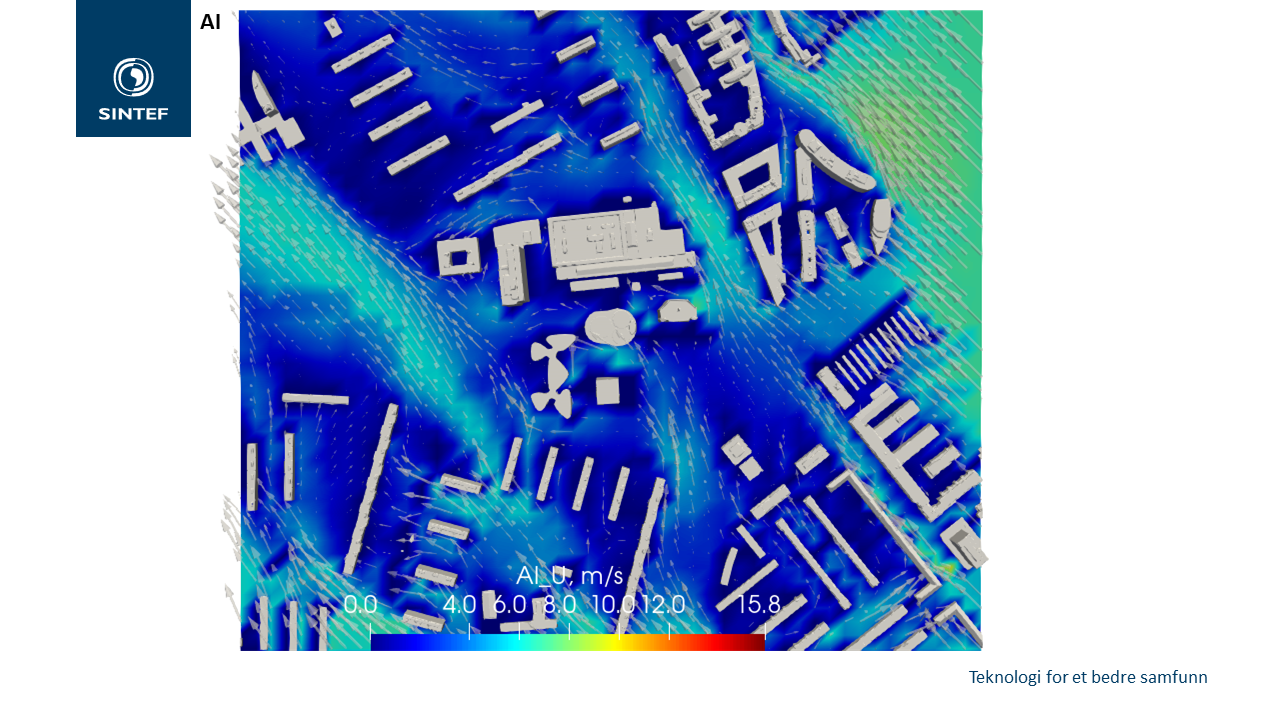

In [ ]:
Image(filename='Slide2.PNG')

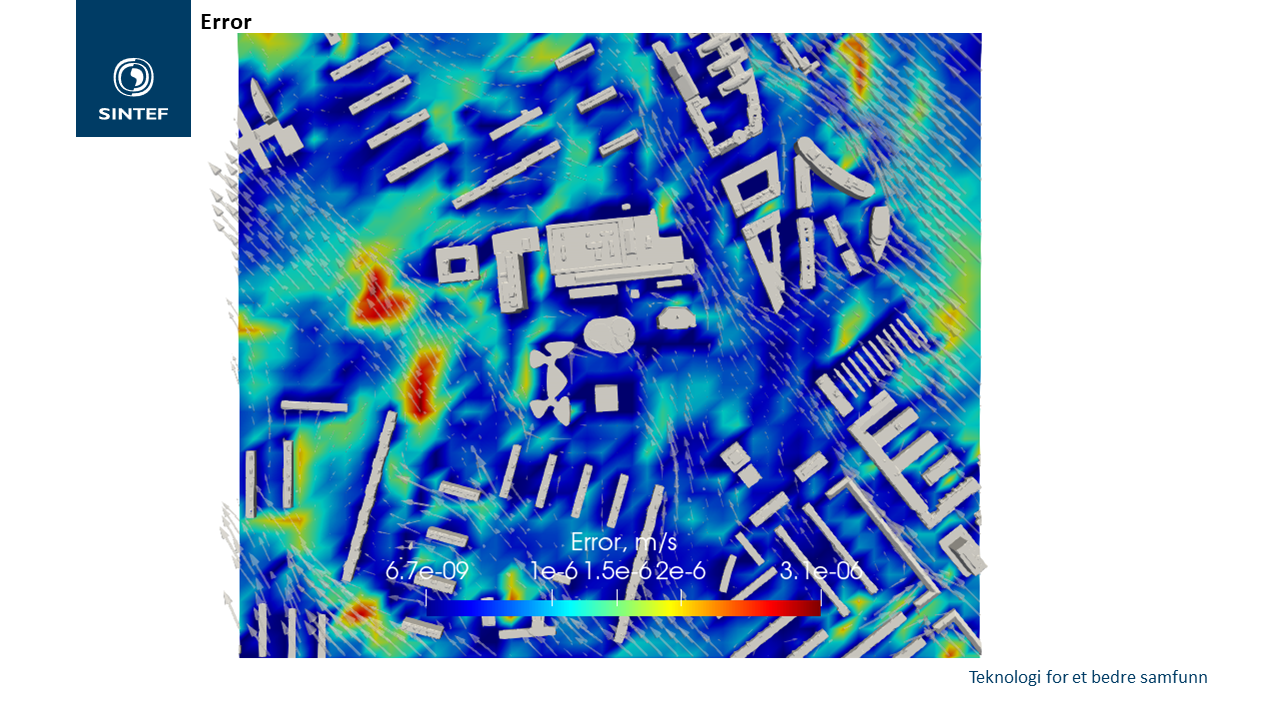

In [ ]:
Image(filename='Slide3.PNG')

 ##  *************************************** END ************************************************************''

***

***

In [ ]:
#old_codes_as_backup.ipynb for backups

## Ends here
##################################################################################3.